In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("transfusion.csv")
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


<ul>
<li><code>Months since Last Donation</code>: this is the number of monthis since this donor's most recent donation.</li>
<li><code>Number of Donations</code>: this is the total number of donations that the donor has made.</li>
<li><code>Total Volume Donated</code>: this is the total amound of blood that the donor has donated in cubuc centimeters.</li>
<li><code>Months since First Donation</code>: this is the number of months since the donor's first donation.</li>
</ul>

Corrigo los nombres para que queden un poco mas lindo

In [3]:
df = df.rename(columns = {"Recency (months)" : "months_since_last_donation" , "Frequency (times)" : "total_donations_done" , "Monetary (c.c. blood)" : "amount_donated_blood (cc)" , "Time (months)" : "months_since_first_donation" , "whether he/she donated blood in March 2007" : "donate" })
df

,months_since_last_donation,total_donations_done,amount_donated_blood (cc),months_since_first_donation,donate
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
df["donate"].replace({1:"Si" , 0:"No"}, inplace=True)
df

,months_since_last_donation,total_donations_done,amount_donated_blood (cc),months_since_first_donation,donate
0,2,50,12500,98,Si
1,0,13,3250,28,Si
2,1,16,4000,35,Si
3,2,20,5000,45,Si
4,1,24,6000,77,No
...,...,...,...,...,...
743,23,2,500,38,No
744,21,2,500,52,No
745,23,3,750,62,No
746,39,1,250,39,No


Text(0, 0.5, 'Tiempo desde la ultima donacion \n(en meses)')

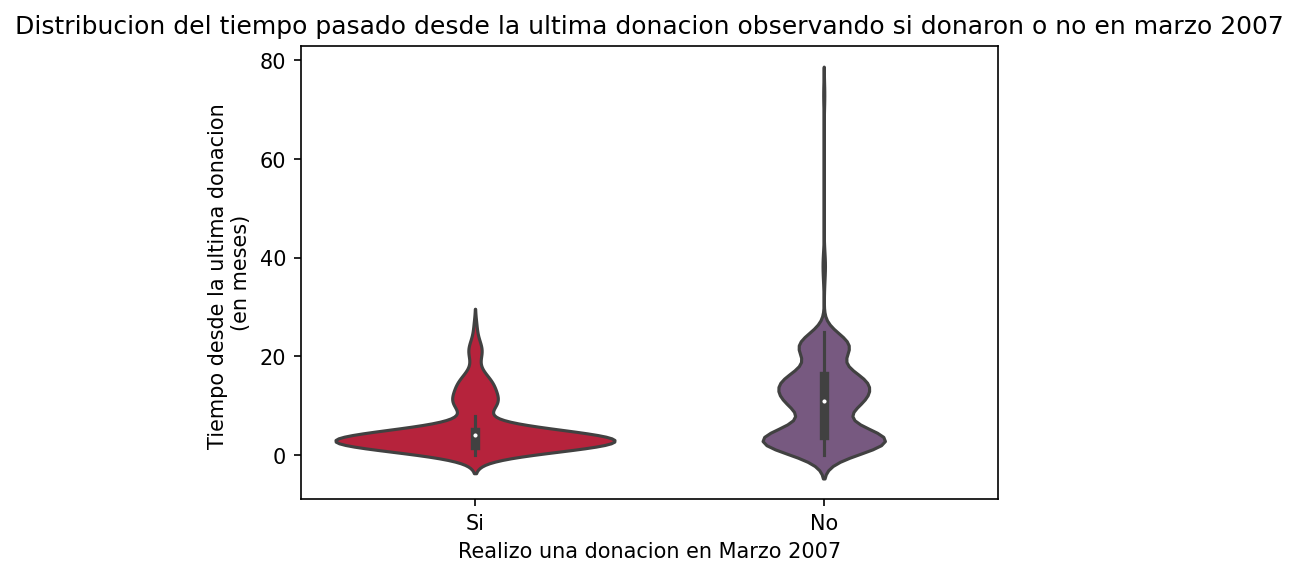

In [5]:
fig = plt.figure(dpi=150)
fig.patch.set_facecolor('xkcd:white')
plt.title("Distribucion del tiempo pasado desde la ultima donacion observando si donaron o no en marzo 2007")
sns.violinplot(data = df, y="months_since_last_donation", x="donate" , palette=["#cf0a2c", "#7a5286" ])
plt.xlabel("Realizo una donacion en Marzo 2007")
plt.ylabel("Tiempo desde la ultima donacion \n(en meses)")

HISTOGRAMA TOMANDO DE 10 MESES de la primer donacion VIENDO SI DONO O NO

In [6]:
df["months_since_first_donation"].max()

98

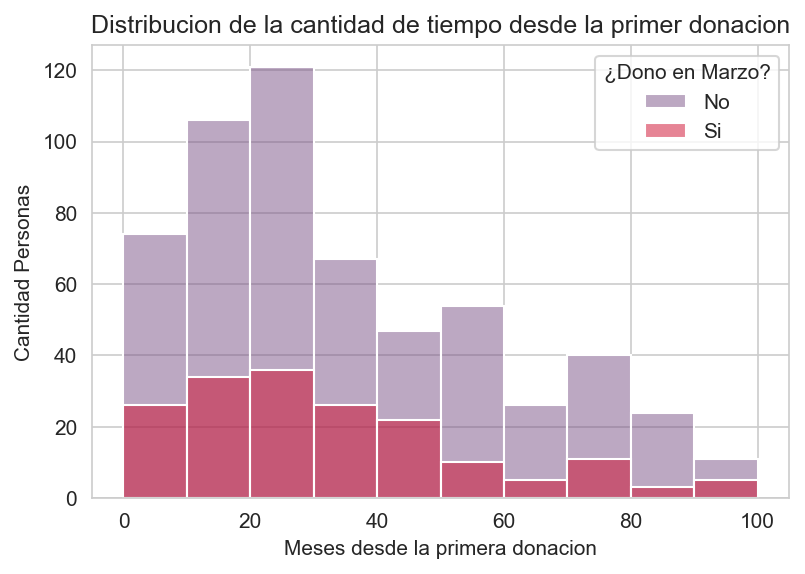

In [7]:
plt.figure(dpi=150)
sns.set_style("whitegrid")
sns.histplot(data = df , x= "months_since_first_donation", hue="donate", bins=10, binrange=[0,100] ,palette=["#cf0a2c", "#7a5286" ], legend=False )
plt.title('Distribucion de la cantidad de tiempo desde la primer donacion')
plt.xlabel("Meses desde la primera donacion")
plt.ylabel("Cantidad Personas")
plt.legend(title="¿Dono en Marzo?" , labels=['No','Si'])
plt.show()